# Customer Segmentation Prototype


In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Exploaratory Data Analysis

In [277]:
cust_data = pd.read_csv('Customer_Data.csv', index_col = 'ID')
cust_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


The dataset contains customer information. There are categorical variables like Gender, Married status, profession, Spending Score that will need to be converted to numerical values. 

In [278]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8068 entries, 462809 to 461879
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 630.3+ KB


Columns like gender, Ever married, Graduation contain binary data and can be encoded using binary encoding. Spendings Score can be converted using ordinal encoding.

In [279]:
cust_data.shape

(8068, 9)

The datas set contains 8068 entries and 9 features.

In [280]:
missing_info = cust_data.isna().sum().to_frame()
missing_info.columns = ['Missing Values']
missing_info

,Missing Values
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


Lets us take care of these missing values.

Dropping all the missing values would not make a huge difference as we have sufficient data. However, to practice i will fill the missing values in categorical columns using the mode. The numerical values with mean and work experience can be filled using KNN Imputers (it finds the nearest neighbors of the missing values baes onn the features and imputes the average). One thing to note is that KNNI can be computationally expensive with large datasets.

In [281]:
from sklearn.impute import KNNImputer

#Categorical Imputation using Mode
for col in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']:
    cust_data[col].fillna(cust_data[col].mode()[0], inplace = True)
    
#numerical Imputation using Mean for Famliy Size
cust_data['Family_Size'].fillna(cust_data['Family_Size'].mean(), inplace = True)

#KNN Imputation for Work Experience
imputer = KNNImputer(n_neighbors = 5)
cust_data['Work_Experience'] = imputer.fit_transform(cust_data[['Work_Experience']])

C:\Users\benem\AppData\Local\Temp\ipykernel_38572\1808438730.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_data[col].fillna(cust_data[col].mode()[0], inplace = True)
C:\Users\benem\AppData\Local\Temp\ipykernel_38572\1808438730.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [282]:
print(cust_data.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


All missing values have been taken care of

Let us check some dataset statics

In [283]:
print('Numerical Values: ')
display(cust_data.describe().T)
print("-" * 87)
print("Nominal Variables: ")
display(cust_data.describe(include="O").T)

Numerical Values: 


,count,mean,std,min,25%,50%,75%,max
Age,8068.0,43.466906,16.711696,18.0,30.0,40.000000,53.0,89.0
Work_Experience,8068.0,2.641663,3.226972,0.0,0.0,1.000000,4.0,14.0
Family_Size,8068.0,2.850123,1.499278,1.0,2.0,2.850123,4.0,9.0


---------------------------------------------------------------------------------------
Nominal Variables: 


,count,unique,top,freq
Gender,8068,2,Male,4417
Ever_Married,8068,2,Yes,4783
Graduated,8068,2,Yes,5046
Profession,8068,9,Artist,2640
Spending_Score,8068,3,Low,4878
Var_1,8068,7,Cat_6,5314


-Gender, Ever Married and Graduated columns are nominal features with 2 possible values only.

-Profession contains 9 unique values

-Spending score haas odrinal values like low, avaergae and high.

-Age ranges from 18-89 years, work experience ranges from 0-14 years and Family Size ranges from 1-9 mebers.All these are discrete values


## Feature Analysis 

Now let us analyze each feature distribution to extract any information that may be relevant for our segmentation approach

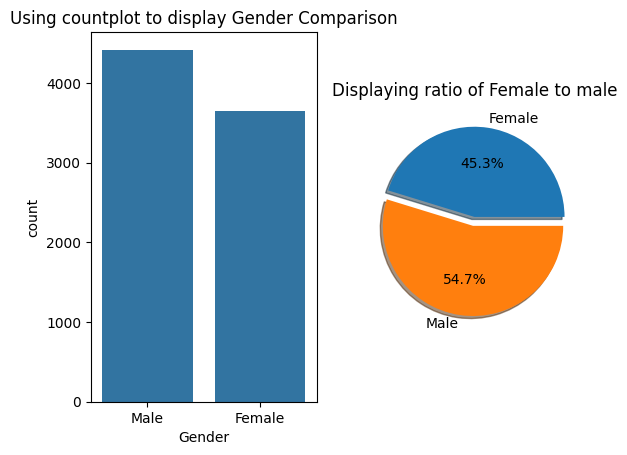

In [284]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.countplot(x="Gender", data = cust_data, ax = ax1)
ax1.set_title("Using countplot to display Gender Comparison")

cust_data.groupby('Gender').size().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax2, shadow = True)
ax2.set_title("Displaying ratio of Female to male")
ax2.set_ylabel("")

plt.show()


The count of males are more than compared to females 

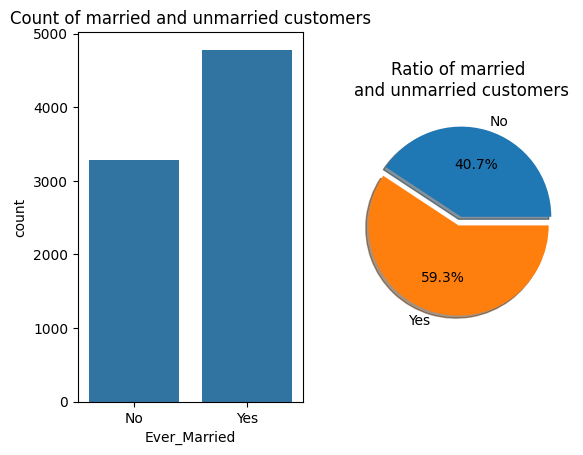

In [285]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.countplot(x="Ever_Married", data = cust_data, ax = ax1)
ax1.set_title("Count of married and unmarried customers")

cust_data.groupby('Ever_Married').size().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax2, shadow = True)
ax2.set_title("Ratio of married \nand unmarried customers")
ax2.set_ylabel("")

plt.show()

The people who are married are more compared to unmarried people

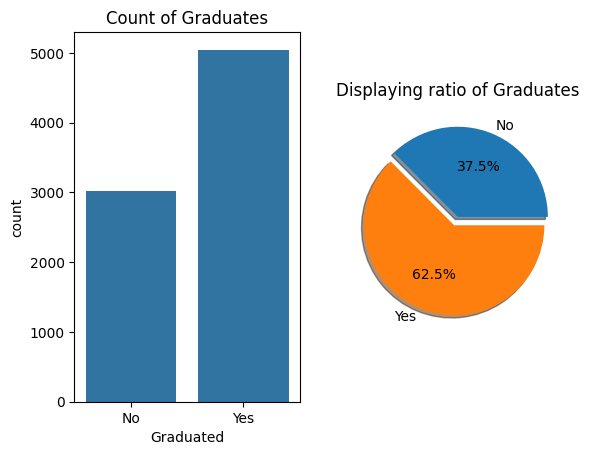

In [286]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.countplot(x="Graduated", data = cust_data, ax = ax1)
ax1.set_title("Count of Graduates")

cust_data.groupby('Graduated').size().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax2, shadow = True)
ax2.set_title("Displaying ratio of Graduates")
ax2.set_ylabel("")

plt.show()

Majority of the people are graduates

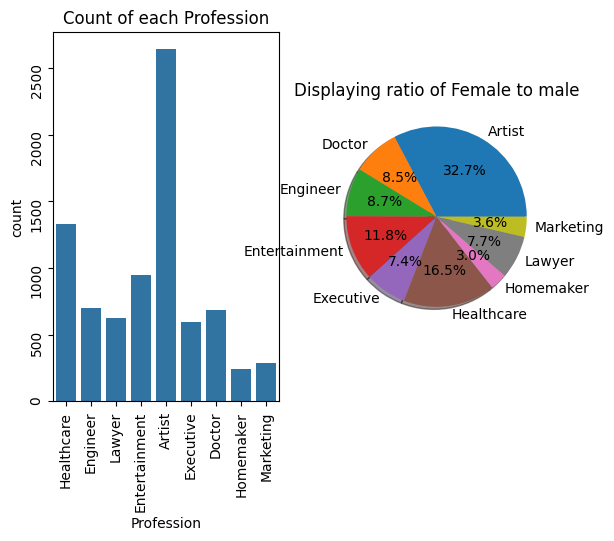

In [287]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.countplot(x="Profession", data = cust_data, ax = ax1)
ax1.set_title("Count of each Profession")
ax1.tick_params(rotation = 90)

cust_data.groupby('Profession').size().plot.pie( autopct = '%1.1f%%', ax = ax2, shadow = True)
ax2.set_title("Displaying ratio of Female to male")
ax2.set_ylabel("")

plt.show()

people who are artists have the highest count, followed by healthcare personnels and peoplle in the entertainment industry

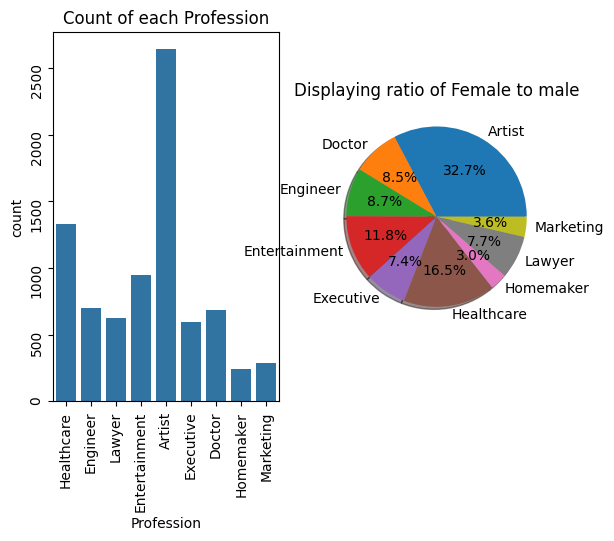

In [288]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.countplot(x="Profession", data = cust_data, ax = ax1)
ax1.set_title("Count of each Profession")
ax1.tick_params(rotation = 90)

cust_data.groupby('Profession').size().plot.pie( autopct = '%1.1f%%', ax = ax2, shadow = True)
ax2.set_title("Displaying ratio of Female to male")
ax2.set_ylabel("")

plt.show()


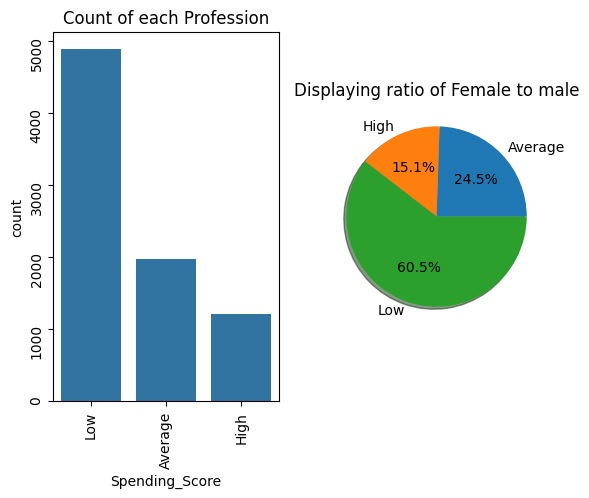

In [289]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

sns.countplot(x="Spending_Score", data = cust_data, ax = ax1)
ax1.set_title("Count of each Profession")
ax1.tick_params(rotation = 90)

cust_data.groupby("Spending_Score").size().plot.pie( autopct = '%1.1f%%', ax = ax2, shadow = True)
ax2.set_title("Displaying ratio of Female to male")
ax2.set_ylabel("")

plt.show()

More than half of the people have a low spending score, followed by average spending score and then high spending score, which is obvious as well.

## Distribution Plots

In [290]:
def dist_plots(data, column, bins, color = None):
    fig, (ax1, ax2) = plt.subplots(nrows=2)
    # Seaborn's histplot can combine a histogram and a density estimation function
    # in one single plot.
    sns.histplot(x=column, data = data, kde = True, ax=ax1, bins=bins, color=color)
    ax1.set_title(f"Distribution of {column} feature")
    
    sns.violinplot(x=column, data =data, color = color, ax = ax2)
    ax2.set_title(f"Violin Plot for Descriptive Analysis of {column} feature")
    
    plt.tight_layout()

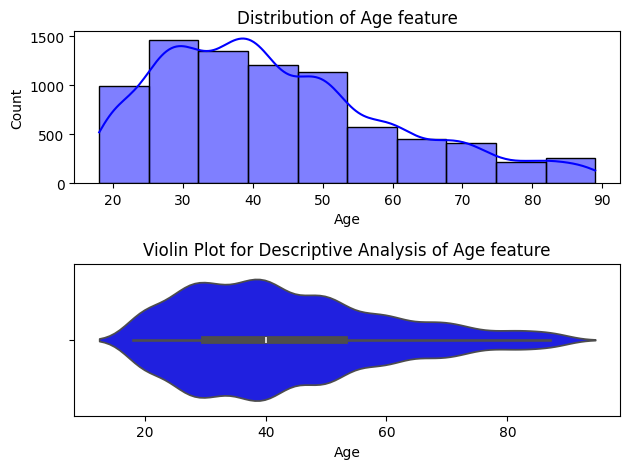

In [291]:
dist_plots(cust_data,'Age', bins = 10, color = 'blue')

here we can see 50% of the customers have age between 30 to 52. The distriution is slighlty right skewed with a peak at 30. The thin tail of the viloin plots suggests a prescence of outliers.

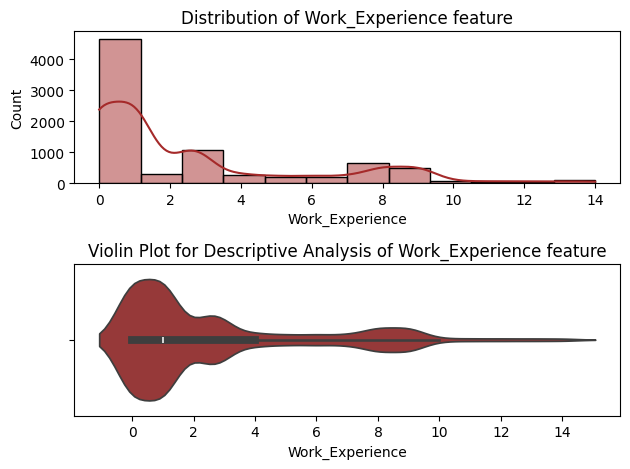

In [292]:
dist_plots(cust_data, 'Work_Experience', bins = 12, color = 'brown')

The data is highly right skewed. 75% of the customers have less that 4 years of work experience. We can clearly see some outliers with the thin violin line towars the right.

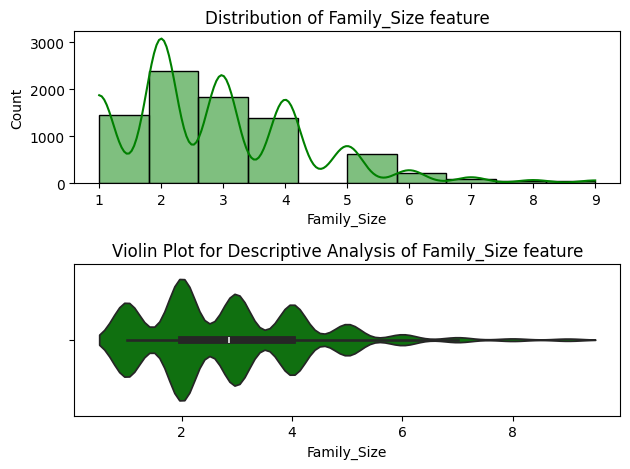

In [293]:
dist_plots(cust_data, 'Family_Size', bins = 10, color = 'green')

Most families have a smaller size with lesser families having a big fmaily size. The most common family sizes are between 2-4. 

### Feature Engineering 

Encoding the categorical columns :

Gender-> One hot encoding (to avoid developeing an 

ordinal relationship)

Ever_married-> Label Encoding

Graduated ->Label Encoding

Profession -> one hot encoding

spending Score -> Ordinal Encoding

In [294]:
#one hot encoding for Gender
def one_hot_encoding(df, columns, prefix_sep = "_"):
    for col in columns:
        one_hot = pd.get_dummies(df[col], prefix = col, prefix_sep = prefix_sep)
        df = pd.concat([df, one_hot], axis =1)
        df.drop(col, axis=1, inplace = True)
    return df
    

cust_data = one_hot_encoding(cust_data, ['Gender', 'Profession'])

In [295]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

#label encoding Ever-Married and and Graduated columns
cust_data = label_encode(cust_data, ['Ever_Married', 'Graduated'])

In [296]:
spending_mapping = {'Low': 1, 'Average': 2, 'High': 3}
cust_data['Spending_Score'] = cust_data['Spending_Score'].map(spending_mapping)

In [297]:
#dropping the Var_1 columns as it is redundant
cust_data.drop(columns=['Var_1'],inplace=True)

In [298]:
cust_data = cust_data.astype('int')

In [299]:
cust_data.head()

,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
ID,,,,,,,,,,,,,,,,,
462809,0,22,0,1,1,4,0,1,0,0,0,0,0,1,0,0,0
462643,1,38,1,2,2,3,1,0,0,0,1,0,0,0,0,0,0
466315,1,67,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0
461735,1,67,1,0,3,2,0,1,0,0,0,0,0,0,0,1,0
462669,1,40,1,2,3,6,1,0,0,0,0,1,0,0,0,0,0


Before moving on to clustering let us scale are data so that the scale of each variable is the same. We will also reduce the dimesionality of our data using PCA to make it easier to cluster.

In [300]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_data = ss.fit_transform(cust_data)

In [301]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

## Clustering 

### Determing the Optimal number of Clusters

#### Elbow Method

In [302]:
def get_clustering_inertia(k, data):
    kmeans = KMeans(
        n_clusters = k,
        algorithm = "lloyd", #using the classical EM-Style algorithms
        n_init = 100,
        max_iter = 150,
        random_state=42,
    ).fit(data)
    return kmeans.inertia_

Retreiving the inertia for a set of clusterings with different values for k

In [303]:
inertia_values = [get_clustering_inertia(k, pca_data) for k in range(1,11)]

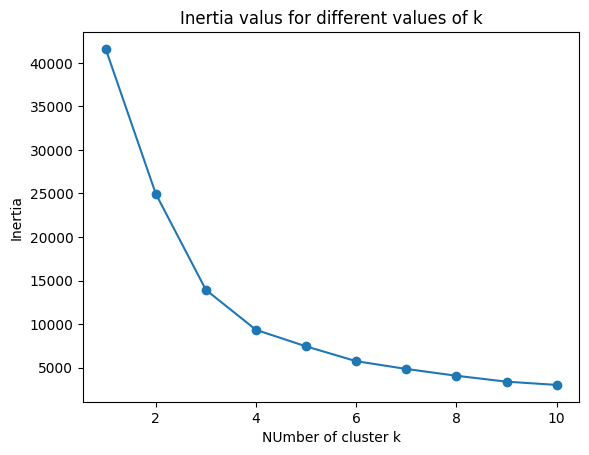

In [304]:
fig, ax = plt.subplots()
plt.plot(range(1,11), inertia_values, "o-")
plt.title("Inertia valus for different values of k")
plt.xlabel("NUmber of cluster k")
plt.ylabel("Inertia")
plt.show()

The k values should be chosen such that if we add another cluster it doesn't result in relevant improvement. Here a value of 4 can be chosen after which the change is slight.

#### Silhouette Score 

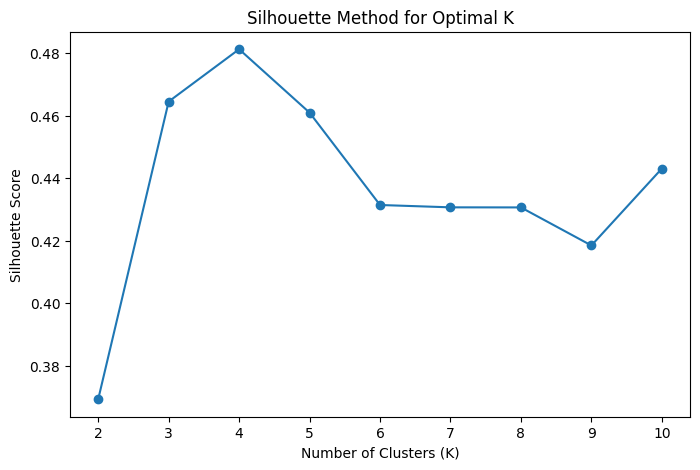

In [305]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Calculate silhouette score for different number of clusters
for k in range(2, 11):  # Minimum K is 2 because silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

The silhouette score decreases as the number of clusters decreases. The best clustering quality is at K=4 as it has the highest silhouette_score.


Comparing the silhouette score and the elbow plot, we can see that the optimal number of clusters is 4 for both. 

1.If cluster qulaity is prioritised, then we usually choose a cluster based on the silhouette score.

2.Else if reduction in inertia is prioritised we should choose a cluster based on the elbow plot.


### Now let us train the K-means model with optimal clusters


In [306]:
optimal_k = 4

optimal_kmeans = KMeans(n_clusters=optimal_k, 
        algorithm = "lloyd", #using the classical EM-Style algorithms
        n_init = 100,
        max_iter = 150,
        random_state=42,
    )
cluster_labels = optimal_kmeans.fit_predict(pca_data)

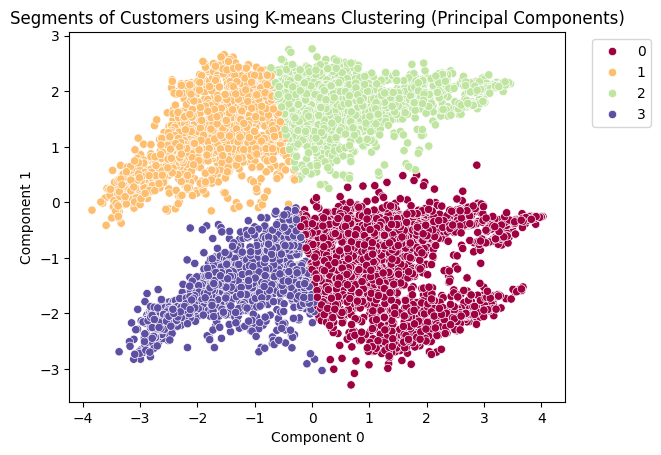

In [307]:
cmap = plt.colormaps["Spectral"]

ax = sns.scatterplot(
    x = pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette=cmap
)
ax.set_title(
    "Segments of Customers using K-means Clustering (Principal Components)"
)
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

Here we can see that the 4 clusters can be clearly differentiated. 

Cluster 0 (Red): Could represent budget-conscious customers or low spenders.

Cluster 1 (Yellow): Could represent frequent but moderate spenders.

Cluster 2 (Green): Could be high spenders or premium customers.

Cluster 3 (Purple): Might represent young and budget-conscious customers.

Let us fit another PCA tarnsformer, but this time we'll compute the componnents for the full 4D space.

In [308]:
"""When we do nit give nay input for n_components, 
 the pricipal components are computed
 for the full feature space."""
pca_full = PCA(random_state=42).fit(scaled_data)

The amounts of variation of the components are stored in the explained_variance_ attribute.

The amount of variation can be interpreted as a measure of how much information is contained in data. High variation means more information. So, now we can tell which dataset’s features can better explain the information in data.

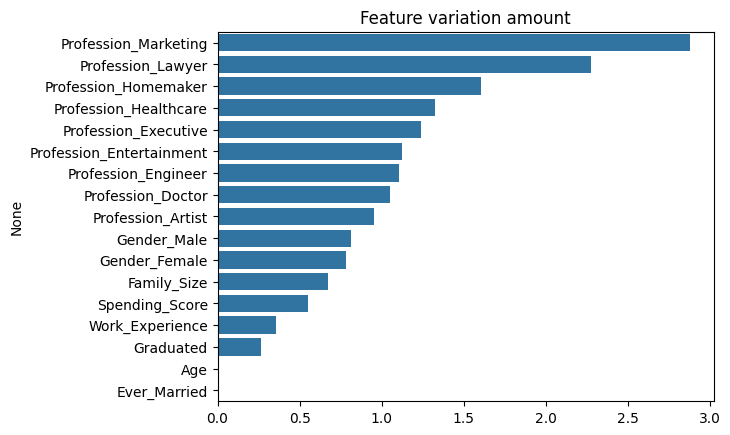

In [310]:
#Coverting scaled data to a dataframe 
scaled_data = pd.DataFrame(scaled_data, columns=cust_data.columns)

component_order = pca_full.explained_variance_.argsort()
var_sorted_columns = scaled_data.columns[component_order]
var_sorted_columns

ax = sns.barplot(y=var_sorted_columns, x=pca_full.explained_variance_)
plt.title("Feature variation amount");

It can be seen that profession followed by Gender and Fmaily size are the features that hold the most information.

We can use all the features to visulaize the clustering results, Age and Ever_marreid column can be exlcuded, However i will include them here.

Let us do Customer Profiling

In [311]:
cust_data['Cluster'] = cluster_labels

# Calculate cluster-wise statistics
cluster_profiles = cust_data.groupby('Cluster').mean()
print(cluster_profiles)

         Ever_Married        Age  ...  Profession_Lawyer  Profession_Marketing
Cluster                           ...                                         
0            0.939929  52.354770  ...           0.111661              0.013074
1            0.119885  31.488761  ...           0.001729              0.074352
2            0.902145  53.184197  ...           0.159079              0.018315
3            0.119975  29.057161  ...           0.000000              0.057161

[4 rows x 17 columns]


In [314]:
cust_data.head()

,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Cluster
ID,,,,,,,,,,,,,,,,,,
462809,0,22,0,1,1,4,0,1,0,0,0,0,0,1,0,0,0,3
462643,1,38,1,2,2,3,1,0,0,0,1,0,0,0,0,0,0,2
466315,1,67,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,2
461735,1,67,1,0,3,2,0,1,0,0,0,0,0,0,0,1,0,0
462669,1,40,1,2,3,6,1,0,0,0,0,1,0,0,0,0,0,2


In [315]:
cust_data['Cluster'].value_counts()

Cluster
0    2830
2    1911
1    1735
3    1592
Name: count, dtype: int64

Here we can see cluster A  has the highest number of customers.

Let us save the model for future use

In [316]:
import joblib

#Saving the trained K-means model
joblib.dump(optimal_kmeans,"kmeans_model.pkl")

#Save the scales and pca data as well
joblib.dump(scaled_data,"scaled.pkl")
joblib.dump(pca_data,"pca.pkl")

['pca.pkl']

We can load the above pickle files to predict new data points. We ca use also scale it and apply pca.

In [ ]:
# Load the saved model
loaded_model = joblib.load('kmeans_model.pkl')
new_scaled_data = scaler.transform(new_data)  # Ensure new data is scaled
new_pca_data = pca.transform(new_scaled_data)
new_cluster = loaded_model.predict(new_pca_data)

print(f"Predicted Cluster for New Data: {new_cluster[0]}")
